In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np

# Путь к папке с файлами
folder_path = r".\models"

# Список всех файлов, оканчивающихся на _loss.txt
loss_files = sorted([f for f in os.listdir(folder_path) if f.endswith("_loss.txt")])

# Списки потерь
separate_losses = []
all_losses = []

for file in loss_files:
    file_path = os.path.join(folder_path, file)
    with open(file_path, 'r') as f:
        losses = [float(line.strip()) for line in f if line.strip()]
        separate_losses.append(losses)
        all_losses.extend(losses)

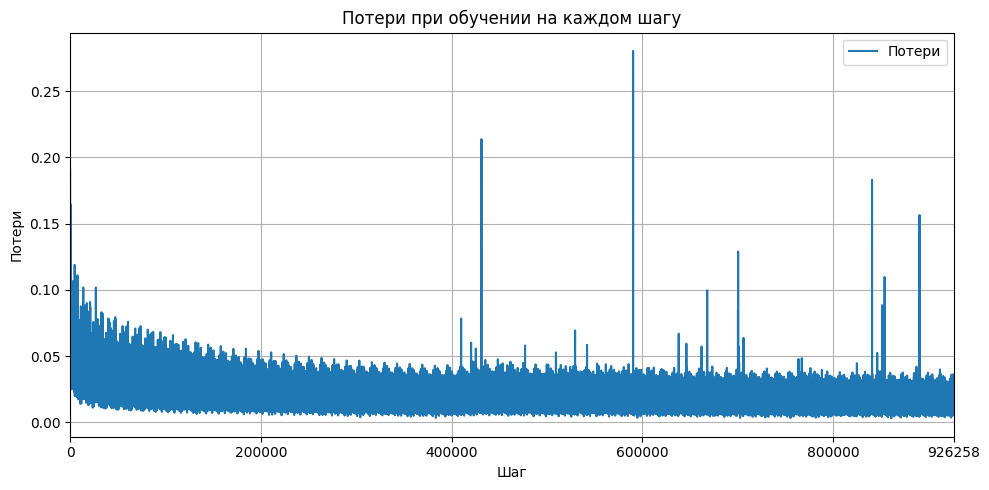

In [2]:
plt.figure(figsize=(10, 5))
plt.plot(all_losses, label='Потери')

last_step = len(all_losses) - 1
xticks = list(plt.xticks()[0])
if last_step not in xticks:
    xticks.append(last_step)
    xticks = sorted(xticks)
    plt.xticks(xticks)

plt.xlabel('Шаг')
plt.ylabel('Потери')
plt.title('Потери при обучении на каждом шагу')
plt.grid(True)
plt.legend()
plt.xlim(0, last_step)
plt.tight_layout()
plt.show()

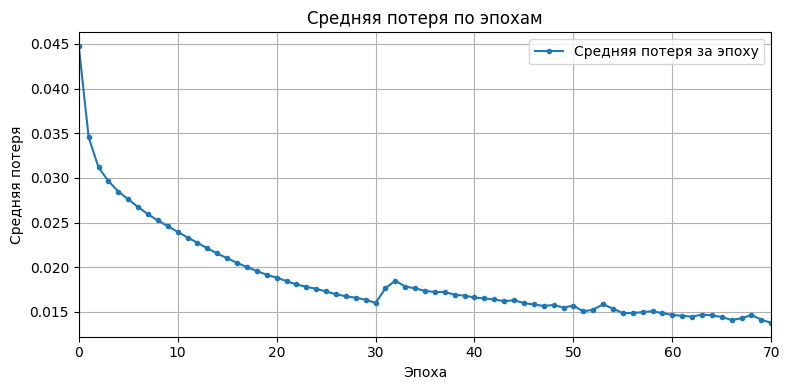

In [3]:
epoch_means = [sum(losses) / len(losses) for losses in separate_losses]

plt.figure(figsize=(8, 4))
plt.plot(epoch_means, marker='.', label='Средняя потеря за эпоху')
plt.xlabel('Эпоха')
plt.ylabel('Средняя потеря')
plt.title('Средняя потеря по эпохам')
plt.grid(True)
plt.legend()
plt.xlim(0, len(epoch_means) - 1)
plt.tight_layout()
plt.show()